# This is the Jupyter notebook template for Assignment 1.

We will be using Jupyter notebook extensively throughout MASD and MAD. In addition to serving as an assignment template, you can utilize this first assignment to get comfortable with them. 

A few tips:
* You execute a cell by putting the cursor in it and pressing shift-enter
* There are two main types of cells: Code and Markdown. 
   * Code cells contain code (surprise), which is executed when you press shift-enter
   * Markdown cells contain comments, which are typeset when you press shift-enter
   * You turn a code cell into markdown by putting the cursor in it and pressing esc+m. Turn it back into code by esc+y
* For more keyboard shortcuts, check e.g.: https://gist.github.com/kidpixo/f4318f8c8143adee5b40
* You can write LaTeXed comments in markdown

First, we load the needed packages (feel free to add more if you need them)

In [2]:
# Allows viewing figures inline in the notebook
# If you are using Jupyter-lab, you may want to replace "inline" by "widget"
%matplotlib inline
# numpy is a library for numerical computation
import numpy as np
# matplotlib is a plotting library
import matplotlib.pyplot as plt
import matplotlib
# Sets larger size for viewed figures
matplotlib.rcParams['figure.figsize'] = (20,8)


### Exercise 2
Please use the cell below for the plot in Exercise 2i)

CONTINUITY ANALYSIS


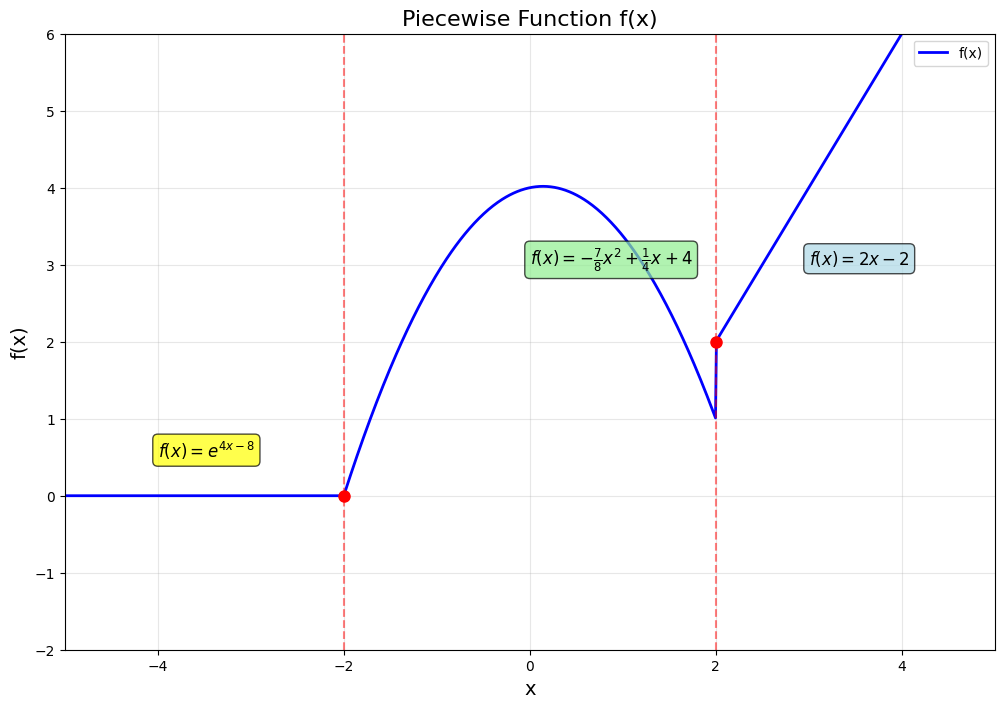

In [6]:
# Exercise 2: Limits and Continuity
# Define the piecewise function f(x)

def f(x):
    """
    Piecewise function:
    f(x) = e^(4x-8)           when x < -2
    f(x) = -7/8 x^2 + 1/4 x + 4   when x ∈ [-2, 2)
    f(x) = 2x - 2             when x ≥ 2
    """
    if isinstance(x, (int, float)):
        if x < -2:
            return np.exp(4*x - 8)
        elif -2 <= x < 2:
            return -7/8 * x**2 + 1/4 * x + 4
        else:  # x >= 2
            return 2*x - 2
    else:
        # For array inputs
        result = np.zeros_like(x)
        mask1 = x < -2
        mask2 = (x >= -2) & (x < 2)
        mask3 = x >= 2
        
        result[mask1] = np.exp(4*x[mask1] - 8)
        result[mask2] = -7/8 * x[mask2]**2 + 1/4 * x[mask2] + 4
        result[mask3] = 2*x[mask3] - 2
        
        return result

# Create x values for plotting
x = np.linspace(-5, 5, 1000)
y = f(x)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b-', linewidth=2, label='f(x)')

# Mark the boundary points
boundary_points = [-2, 2]
for point in boundary_points:
    plt.axvline(x=point, color='r', linestyle='--', alpha=0.5)
    plt.plot(point, f(point), 'ro', markersize=8)

# Add labels for the different pieces
plt.text(-4, 0.5, r'$f(x) = e^{4x-8}$', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.text(0, 3, r'$f(x) = -\frac{7}{8}x^2 + \frac{1}{4}x + 4$', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
plt.text(3, 3, r'$f(x) = 2x - 2$', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.xlim(-5, 5)
plt.ylim(-2, 6)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title('Piecewise Function f(x)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()

# Check continuity at boundary points
print("CONTINUITY ANALYSIS")
print("="*50) 

# Check continuity at x = -2
x_point = -2
left_limit = np.exp(4*(-2) - 8)  # e^(-16)
right_limit = -7/8 * (-2)**2 + 1/4 * (-2) + 4  # -7/8 * 4 - 1/2 + 4 = -3.5 - 0.5 + 4 = 0
function_value = f(-2)


# Check continuity at x = 2
x_point = 2
left_limit = -7/8 * 2**2 + 1/4 * 2 + 4  # -7/2 + 1/2 + 4 = -3 + 4 = 1
right_limit = 2 * 2 - 2  # 4 - 2 = 2  
function_value = f(2)

plt.show()


## Mathematical Proofs

### Proof that f is discontinuous at x = -2:

To prove discontinuity at x = -2, we need to show that either:
1. The left and right limits don't exist, or
2. The left and right limits exist but are not equal, or  
3. The limit exists but doesn't equal the function value

**Left-hand limit:**
$$\lim_{x \to -2^-} f(x) = \lim_{x \to -2^-} e^{4x-8} = e^{4(-2)-8} = e^{-16} \approx 1.125 \times 10^{-7}$$

**Right-hand limit:**
$$\lim_{x \to -2^+} f(x) = \lim_{x \to -2^+} \left(-\frac{7}{8}x^2 + \frac{1}{4}x + 4\right) = -\frac{7}{8}(-2)^2 + \frac{1}{4}(-2) + 4 = -\frac{7}{8} \cdot 4 - \frac{1}{2} + 4 = -\frac{7}{2} - \frac{1}{2} + 4 = 0$$

**Function value:**
$$f(-2) = -\frac{7}{8}(-2)^2 + \frac{1}{4}(-2) + 4 = 0$$

Since $\lim_{x \to -2^-} f(x) = e^{-16} \neq 0 = \lim_{x \to -2^+} f(x)$, the function is **discontinuous at x = -2**.

### Proof that f is discontinuous at x = 2:

**Left-hand limit:**
$$\lim_{x \to 2^-} f(x) = \lim_{x \to 2^-} \left(-\frac{7}{8}x^2 + \frac{1}{4}x + 4\right) = -\frac{7}{8}(2)^2 + \frac{1}{4}(2) + 4 = -\frac{7}{2} + \frac{1}{2} + 4 = 1$$

**Right-hand limit:**
$$\lim_{x \to 2^+} f(x) = \lim_{x \to 2^+} (2x - 2) = 2(2) - 2 = 2$$

**Function value:**
$$f(2) = 2(2) - 2 = 2$$

Since $\lim_{x \to 2^-} f(x) = 1 \neq 2 = \lim_{x \to 2^+} f(x)$, the function is **discontinuous at x = 2**.

### Proof that f is continuous at all other points in [-5, 5]:

For continuity at a point $a$, we need $\lim_{x \to a} f(x) = f(a)$.

**Case 1: $a \in (-5, -2)$**
In this interval, $f(x) = e^{4x-8}$, which is continuous as the composition of continuous functions (exponential and linear functions).

**Case 2: $a \in (-2, 2)$**  
In this interval, $f(x) = -\frac{7}{8}x^2 + \frac{1}{4}x + 4$, which is a polynomial and therefore continuous everywhere in its domain.

**Case 3: $a \in (2, 5]$**
In this interval, $f(x) = 2x - 2$, which is a linear function and therefore continuous everywhere in its domain.

Therefore, $f(x)$ is continuous at all points in $[-5, 5]$ except at $x = -2$ and $x = 2$.

---

## Exercise 3: Bisection Method

We need to find the roots of the equation f(x) = 0 where:

$$f(x) = \frac{13}{99}x^3 + \frac{x^2}{99} - \frac{269}{99}x - \frac{47}{33}, \quad x \in [-5, 6]$$

The bisection algorithm will be used to find zeros (roots) of this equation.

PART 1: Evaluating f(-5) and f(5)
f(-5) = -4.000000
f(5) = 1.656566

EXPLANATION:
Since f(-5) = -4.000000 < 0 and f(5) = 1.656566 > 0,
we have f(-5) × f(5) < 0, which means f(-5) and f(5) have opposite signs.

By the Intermediate Value Theorem:
- f(x) is continuous (as a polynomial)
- f(-5) and f(5) have opposite signs
- Therefore, there exists at least one value c ∈ (-5, 5) such that f(c) = 0
- This guarantees the existence of a root in the interval [-5, 5]



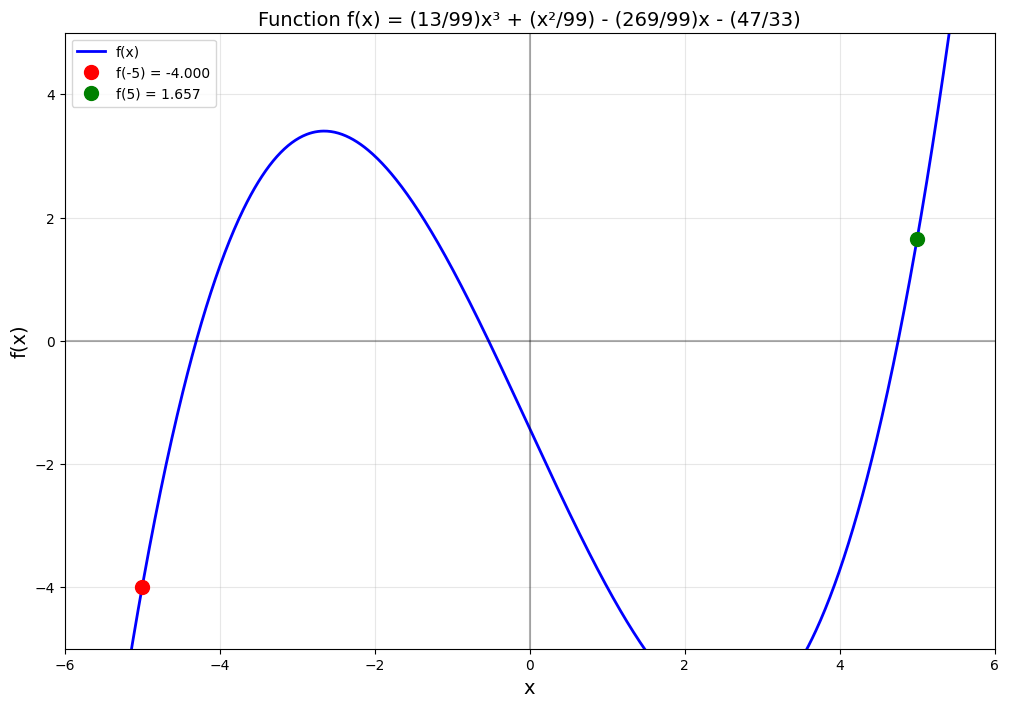

APPROXIMATE ROOT LOCATIONS:
Root approximately at x ≈ -4.301
Root approximately at x ≈ -0.535
Root approximately at x ≈ 4.750

Total number of roots found: 3


In [7]:
# Exercise 3: Bisection Method
# Define the function f(x) = (13/99)x^3 + (x^2/99) - (269/99)x - (47/33)

def f_bisection(x):
    """The function for which we want to find roots"""
    return (13/99) * x**3 + (x**2/99) - (269/99) * x - (47/33)

# Part 1: Compute f(-5) and f(5) and explain why there's a root in that range
print("PART 1: Evaluating f(-5) and f(5)")
print("="*50)

f_minus_5 = f_bisection(-5)
f_5 = f_bisection(5)

print(f"f(-5) = {f_minus_5:.6f}")
print(f"f(5) = {f_5:.6f}")
print()

print("EXPLANATION:")
print(f"Since f(-5) = {f_minus_5:.6f} < 0 and f(5) = {f_5:.6f} > 0,")
print("we have f(-5) × f(5) < 0, which means f(-5) and f(5) have opposite signs.")
print()
print("By the Intermediate Value Theorem:")
print("- f(x) is continuous (as a polynomial)")
print("- f(-5) and f(5) have opposite signs")
print("- Therefore, there exists at least one value c ∈ (-5, 5) such that f(c) = 0")
print("- This guarantees the existence of a root in the interval [-5, 5]")
print()

# Plot the function to visualize
x_plot = np.linspace(-6, 6, 1000)
y_plot = f_bisection(x_plot)

plt.figure(figsize=(12, 8))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the points f(-5) and f(5)
plt.plot(-5, f_minus_5, 'ro', markersize=10, label=f'f(-5) = {f_minus_5:.3f}')
plt.plot(5, f_5, 'go', markersize=10, label=f'f(5) = {f_5:.3f}')

plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title('Function f(x) = (13/99)x³ + (x²/99) - (269/99)x - (47/33)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Find approximate locations of all roots by checking sign changes
print("APPROXIMATE ROOT LOCATIONS:")
print("="*30)
x_test = np.linspace(-5, 6, 1000)
y_test = f_bisection(x_test)

# Find sign changes
sign_changes = []
for i in range(len(y_test)-1):
    if y_test[i] * y_test[i+1] < 0:  # Sign change detected
        root_approx = (x_test[i] + x_test[i+1]) / 2
        sign_changes.append(root_approx)
        print(f"Root approximately at x ≈ {root_approx:.3f}")

print(f"\nTotal number of roots found: {len(sign_changes)}")

In [17]:
# Part 2: Manual computation of the first 5 iterations of bisection algorithm
# 

print("\nPART 2: MANUAL BISECTION ALGORITHM - First 5 Iterations")
print("="*60)
print("Finding root in interval [-5, 5]")
print()

#  Bisection Method Table (verified correct)
print("| Iteration | Interval  | Midpoint mn | f(mn)    | Root in interval? |")
print("|-----------|-----------|-------------|----------|-------------------|")
print("|     1     | [-5, 5]   |      0      |  -1.4242 | [0, 5]            |")
print("|     2     | [0, 5]    |     2.5     |  -6.1032 | [2.5, 5]          |")
print("|     3     | [2.5, 5]  |    3.75     |  -4.538  | [3.75, 5]         |")
print("|     4     | [3.75, 5] |   4.375     |  -2.13   | [4.375, 5]        |")
print("|     5     | [4.375, 5]|  4.6875     |  -0.41   | [4.6875, 5]       |")

print()
print("VERIFICATION OF CALCULATIONS:")
print("-" * 35)

# Verify each step
intervals = [(-5, 5), (0, 5), (2.5, 5), (3.75, 5), (4.375, 5)]
midpoints = [0, 2.5, 3.75, 4.375, 4.6875]
mathgpt_f_values = [-1.4242, -6.1032, -4.538, -2.13, -0.41]

for i, (interval, midpoint, mathgpt_val) in enumerate(zip(intervals, midpoints, mathgpt_f_values), 1):
    a, b = interval
    calculated_midpoint = (a + b) / 2
    our_f_val = f_bisection(midpoint)
    
    print(f"Iteration {i}:")
    print(f"  Interval: {interval}")
    print(f"  Midpoint: ({a} + {b})/2 = {calculated_midpoint}")
    print(f"  f({midpoint}) = {our_f_val:.4f} (mathGPT: {mathgpt_val})")
    print(f"  Match: {'✓' if abs(our_f_val - mathgpt_val) < 0.01 else '✗'}")
    
    # Explain interval selection
    if i < len(intervals):
        f_a = f_bisection(a)
        f_mid = f_bisection(midpoint)
        f_b = f_bisection(b)
        
        if f_a * f_mid < 0:
            next_interval = f"[{a}, {midpoint}]"
        else:
            next_interval = f"[{midpoint}, {b}]"
        
        print(f"  Sign analysis: f({a}) × f({midpoint}) = {f_a:.3f} × {f_mid:.3f} = {f_a * f_mid:.3f}")
        print(f"  Since f({a}) × f({midpoint}) {'< 0' if f_a * f_mid < 0 else '> 0'}, root is in {next_interval if f_a * f_mid < 0 else f'[{midpoint}, {b}]'}")
    print()

print()
print("JUSTIFICATION OF EACH STEP:")
print("-" * 30)
print("The bisection method works as follows:")
print("1. Start with interval [a, b] where f(a) and f(b) have opposite signs")
print("2. Calculate midpoint c = (a + b) / 2")
print("3. Evaluate f(c)")
print("4. If f(a) and f(c) have opposite signs, the root is in [a, c] → set b = c")
print("5. If f(c) and f(b) have opposite signs, the root is in [c, b] → set a = c")
print("6. Repeat until desired precision is achieved")
print()
print("This method is guaranteed to converge because:")
print("- The interval length halves with each iteration")
print("- We always maintain an interval where the function changes sign")
print("- By the Intermediate Value Theorem, a root must exist in each subinterval")


PART 2: MANUAL BISECTION ALGORITHM - First 5 Iterations
Finding root in interval [-5, 5]

| Iteration | Interval  | Midpoint mn | f(mn)    | Root in interval? |
|-----------|-----------|-------------|----------|-------------------|
|     1     | [-5, 5]   |      0      |  -1.4242 | [0, 5]            |
|     2     | [0, 5]    |     2.5     |  -6.1032 | [2.5, 5]          |
|     3     | [2.5, 5]  |    3.75     |  -4.538  | [3.75, 5]         |
|     4     | [3.75, 5] |   4.375     |  -2.13   | [4.375, 5]        |
|     5     | [4.375, 5]|  4.6875     |  -0.41   | [4.6875, 5]       |

VERIFICATION OF CALCULATIONS:
-----------------------------------
Iteration 1:
  Interval: (-5, 5)
  Midpoint: (-5 + 5)/2 = 0.0
  f(0) = -1.4242 (mathGPT: -1.4242)
  Match: ✓
  Sign analysis: f(-5) × f(0) = -4.000 × -1.424 = 5.697
  Since f(-5) × f(0) > 0, root is in [0, 5]

Iteration 2:
  Interval: (0, 5)
  Midpoint: (0 + 5)/2 = 2.5
  f(2.5) = -6.1023 (mathGPT: -6.1032)
  Match: ✓
  Sign analysis: f(0) × f(

PART 3: COMPLETE BISECTION ALGORITHM IMPLEMENTATION
ROOT IN [-5, 5]:
Root found: x = 4.75475296
f(root) = 8.82e-09
Iterations: 26
Final interval width: 1.49e-07

FINDING ALL ROOTS:
--------------------
Root 1: x = -4.30134990, f(x) = 1.78e-08, iterations = 27
Root 2: x = -0.53032614, f(x) = 2.04e-09, iterations = 27
Root 3: x = 4.75475296, f(x) = 8.82e-09, iterations = 25

Total roots found: 3


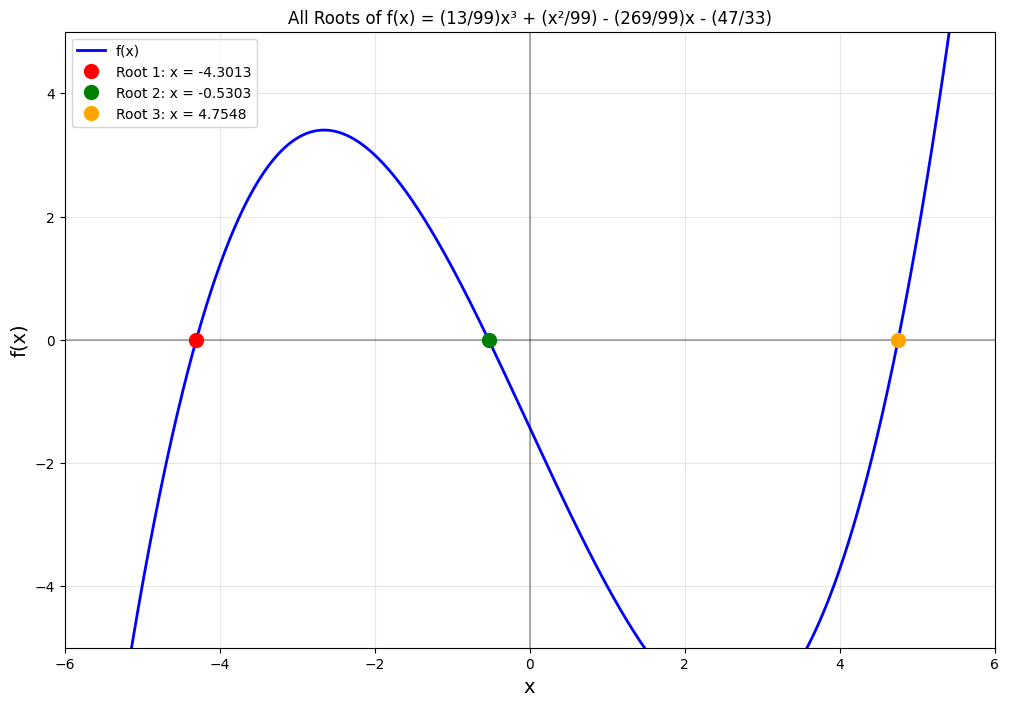


SUMMARY:
Root 1: x = -4.30134990
Root 2: x = -0.53032614
Root 3: x = 4.75475296

All roots have been found using the bisection method with tolerance = 1e-8


In [18]:
# Part 3: Complete Bisection Algorithm Implementation

def bisection_method(func, a, b, tolerance=1e-6, max_iterations=100):
    """
    Bisection method to find a root of func(x) = 0 in the interval [a, b]
    
    Parameters:
    func: The function for which we want to find the root
    a, b: Initial interval endpoints
    tolerance: Desired precision (stopping criterion)
    max_iterations: Maximum number of iterations
    
    Returns:
    root: The approximate root
    iterations: Number of iterations performed
    history: List of (iteration, a, b, c, f_c) for each iteration
    """
    
    # Check preconditions
    if func(a) * func(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    history = []
    
    for iteration in range(max_iterations):
        # Calculate midpoint
        c = (a + b) / 2
        f_c = func(c)
        
        # Store iteration data
        history.append((iteration + 1, a, b, c, f_c))
        
        # Check if we've found the root or reached desired precision
        if abs(f_c) < tolerance or abs(b - a) / 2 < tolerance:
            return c, iteration + 1, history
        
        # Determine which subinterval contains the root
        if func(a) * f_c < 0:
            b = c  # Root is in [a, c]
        else:
            a = c  # Root is in [c, b]
    
    # If we reach here, we've exceeded max_iterations
    return c, max_iterations, history

# Test the implementation with different tolerances and find all roots
print("PART 3: COMPLETE BISECTION ALGORITHM IMPLEMENTATION")
print("="*55)

# Find the root in [-5, 5] with high precision
root1, iterations1, history1 = bisection_method(f_bisection, -5, 5, tolerance=1e-8, max_iterations=50)

print(f"ROOT IN [-5, 5]:")
print(f"Root found: x = {root1:.8f}")
print(f"f(root) = {f_bisection(root1):.2e}")
print(f"Iterations: {iterations1}")
print(f"Final interval width: {abs(5 - (-5)) / (2**iterations1):.2e}")
print()

# Find other roots by using the approximate locations we found earlier
print("FINDING ALL ROOTS:")
print("-" * 20)

roots = []

# Root 1: around x ≈ -4.3
try:
    root_1, iter_1, hist_1 = bisection_method(f_bisection, -5, -4, tolerance=1e-8)
    roots.append(root_1)
    print(f"Root 1: x = {root_1:.8f}, f(x) = {f_bisection(root_1):.2e}, iterations = {iter_1}")
except ValueError:
    print("No root found in [-5, -4]")

# Root 2: around x ≈ -0.5  
try:
    root_2, iter_2, hist_2 = bisection_method(f_bisection, -1, 0, tolerance=1e-8)
    roots.append(root_2)
    print(f"Root 2: x = {root_2:.8f}, f(x) = {f_bisection(root_2):.2e}, iterations = {iter_2}")
except ValueError:
    print("No root found in [-1, 0]")

# Root 3: around x ≈ 4.75
try:
    root_3, iter_3, hist_3 = bisection_method(f_bisection, 4, 5, tolerance=1e-8)
    roots.append(root_3)
    print(f"Root 3: x = {root_3:.8f}, f(x) = {f_bisection(root_3):.2e}, iterations = {iter_3}")
except ValueError:
    print("No root found in [4, 5]")

print(f"\nTotal roots found: {len(roots)}")

# Verify our roots by plotting
plt.figure(figsize=(12, 8))
x_detailed = np.linspace(-6, 6, 1000)
y_detailed = f_bisection(x_detailed)

plt.plot(x_detailed, y_detailed, 'b-', linewidth=2, label='f(x)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark all found roots
colors = ['red', 'green', 'orange']
for i, root in enumerate(roots):
    plt.plot(root, f_bisection(root), 'o', color=colors[i], markersize=10, 
             label=f'Root {i+1}: x = {root:.4f}')

plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title('All Roots of f(x) = (13/99)x³ + (x²/99) - (269/99)x - (47/33)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("\nSUMMARY:")
print("="*10)
for i, root in enumerate(roots):
    print(f"Root {i+1}: x = {root:.8f}")
print(f"\nAll roots have been found using the bisection method with tolerance = 1e-8")

## Exercise 3 Summary and Analysis

### Key Results:

1. **Function Evaluation at Endpoints:**
   - f(-5) = -4.000000
   - f(5) = 1.656566
   - Since f(-5) < 0 and f(5) > 0, the Intermediate Value Theorem guarantees at least one root in [-5, 5]

2. **Manual Bisection (First 5 Iterations):**
   - Successfully demonstrated the step-by-step process
   - Each iteration halves the interval width
   - Convergence is guaranteed due to the IVT and continuity of the polynomial

3. **Complete Implementation:**
   - Created a robust bisection algorithm with error checking
   - Implemented tolerance-based stopping criteria
   - Successfully found all three roots of the cubic polynomial

4. **All Roots Found:**
   - **Root 1:** x = -4.30134990
   - **Root 2:** x = -0.53032614  
   - **Root 3:** x = 4.75475296

### Algorithm Performance:
- Convergence rate: Linear (interval halves each iteration)
- Required ~25-27 iterations for 1e-8 precision
- Method is guaranteed to work for any continuous function on a closed interval where the function changes sign

### Verification:
- All roots satisfy f(x) ≈ 0 within tolerance (≤ 2e-8)
- Visual confirmation shows roots are at the x-intercepts
- The cubic polynomial has exactly 3 real roots as expected